# Data Mining: Cardiovascular Disease Classification Problem
**Submmitted by: Lisa D'sa (UID: 209004) and Jessintha Mathew (UID 209005)**

Various classification algorithms viz. Naive Baye's, K-Nearest Neighbours, Decision Trees, Random Forest and Gradient Boost 
have been performed to classify prospective patients with regards to the chance of them developing cardiovascular disease. 

## Dataset Description

> source: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

The original dataset contains 70,000 patient records.

There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('cardio_train.csv')
df.drop('id', axis = 1, inplace = True)
df.head()

# 10 predictor variables 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# EDA

## Null values 

In [4]:
pd.isna(df).sum() # no missing values, all values are integers 

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.describe()

# no missing values 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


# Duplicates 

In [7]:
df.duplicated().sum()

24

In [8]:
df[df.duplicated()] # 24 duplicate rows 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [10]:
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
len(df)

69976

# Columns / Variables 

# Age

- Percentage of people in each category that do have a disease.

In [13]:
# CREATING AN AGE IN YEARS COLUMN
years = []
for i, data in df.iterrows():
    years.append(np.round(data.age/365, decimals = 2))
    
df.insert(1, 'years', years)
df.head()

,age,years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.42,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.66,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.28,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,47.87,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
df.years.describe()

count    69976.00000
mean        53.33958
std          6.75991
min         29.58000
25%         48.39000
50%         53.98000
75%         58.43000
max         64.97000
Name: years, dtype: float64

In [514]:
# CATEGORIZING AGE INTO CLASSES

age_cats = pd.cut(df.years, 5, precision = 0) # preferring cut over qcut 
df.insert(2, 'age_cats', age_cats)
age_cats.value_counts(normalize = True)

In [20]:
# CARDIO DISEASE POSITIVE PEOPLE 
cardio = df.loc[df['cardio'] == 1]
cardio.shape

(34972, 14)

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years'>

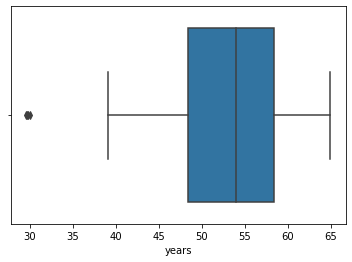

In [21]:
# PRESENCE OF OUTLIERS IN 'YEARS' COLUMN

sns.boxplot(df.years)

## Dealing with outliers 

In [22]:
df.head()

,age,years,age_cats,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",2,169,82.0,150,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,156,56.0,100,60,1,1,0,0,0,0


In [180]:
df.years.describe()

count    69972.000000
mean        53.340926
std          6.757758
min         39.110000
25%         48.400000
50%         53.980000
75%         58.430000
max         64.970000
Name: years, dtype: float64

In [23]:
# IQR strategy 
Q1 = Q1 = df.years.quantile(0.25)
Q3 = df.years.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
df2 = df[(df.years > r_whisker) | (df.years < l_whisker)] # 29 year olds 
df2

,age,years,age_cats,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,10878,29.80,"(30.0, 37.0]",1,175,59.0,120,80,1,1,0,0,1,0
22343,10798,29.58,"(30.0, 37.0]",2,175,92.0,100,60,1,1,0,0,1,0
30666,10859,29.75,"(30.0, 37.0]",1,159,59.0,120,80,1,1,0,0,1,0
55905,10964,30.04,"(30.0, 37.0]",1,160,59.0,110,70,1,1,0,0,1,0


In [24]:
print('Q1: ', Q1)
print('Q2 (median): ', df.years.median())
print('Q3: ', Q3)

print('Left whisker: ', l_whisker)
print('Right whisker: ', r_whisker)

print('Number of outliers detected: ', len(df2))

Q1:  48.39
Q2 (median):  53.98
Q3:  58.43
Left whisker:  33.33
Right whisker:  73.49
Number of outliers detected:  4


In [25]:
# ONLY 4 OUTLIER ROWS HENCE WE DROP THEM
df.drop(index = df2.index, inplace = True)

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years'>

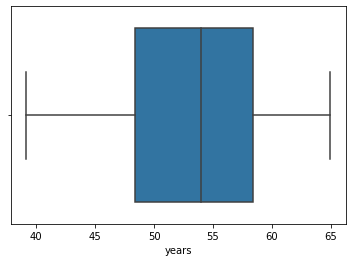

In [26]:
sns.boxplot(df.years)

In [27]:
df.age_cats.value_counts()

(51.0, 58.0]    24639
(58.0, 65.0]    20769
(44.0, 51.0]    16743
(37.0, 44.0]     7821
(30.0, 37.0]        0
Name: age_cats, dtype: int64

In [28]:
df.age_cats.unique()

[(44.0, 51.0], (51.0, 58.0], (58.0, 65.0], (37.0, 44.0]]
Categories (4, interval[float64]): [(37.0, 44.0] < (44.0, 51.0] < (51.0, 58.0] < (58.0, 65.0]]

In [29]:
# l = []
# for category in df.age_cats:
#     x = len(df[(df.age_cats == category) & (df.cardio == 1)]) # positive for each category
#     y = len(df[(df.age_cats == category) & (df.cardio == 0)]) # negative for each category 
#     z = len(df)
#     total = df.age_cats.value_counts()[category]
#     l.append((category, total, x, y, z, x/total))
    
# l

<AxesSubplot:>

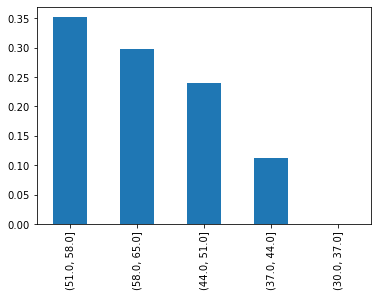

In [96]:
df.age_cats.value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

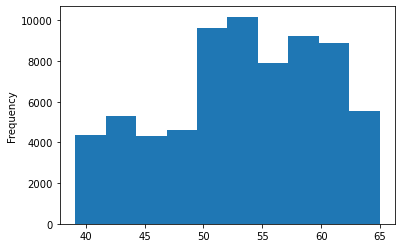

In [92]:
df.years.plot(kind = 'hist')

<AxesSubplot:>

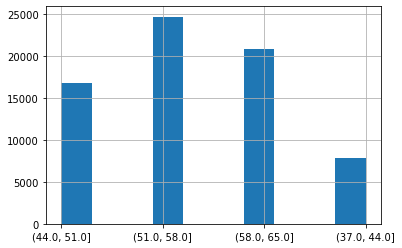

In [91]:
df.age_cats.astype('str').hist()

In [69]:
df.groupby(df.age_cats.astype(str)).cardio.value_counts(normalize=True)

age_cats      cardio
(37.0, 44.0]  0         0.722158
              1         0.277842
(44.0, 51.0]  0         0.585498
              1         0.414502
(51.0, 58.0]  1         0.511871
              0         0.488129
(58.0, 65.0]  1         0.637826
              0         0.362174
Name: cardio, dtype: float64

In [101]:
av = df.groupby(df.age_cats.astype(str)).cardio.value_counts(normalize=True)
av

age_cats      cardio
(37.0, 44.0]  0         0.722158
              1         0.277842
(44.0, 51.0]  0         0.585498
              1         0.414502
(51.0, 58.0]  1         0.511871
              0         0.488129
(58.0, 65.0]  1         0.637826
              0         0.362174
Name: cardio, dtype: float64

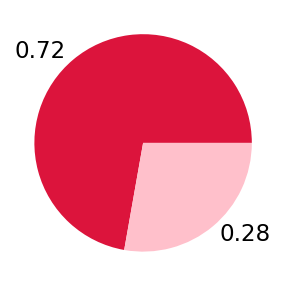

---------------------


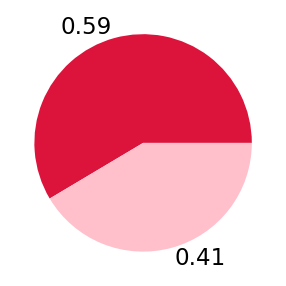

---------------------


In [152]:
for i in [0, 2]:
#     print(av[[i, i+1]])
#     plt.subplot(1, 2, )
    plt.figure(figsize = (5, 5))
    plt.pie(av[[i, i+1]], labels = [np.round(av[i], decimals = 2), np.round(av[i+1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
    plt.show()
    print("---------------------")

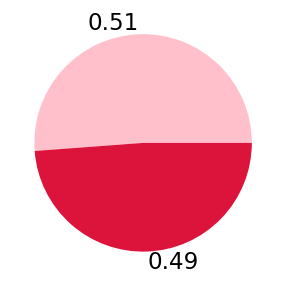

---------------------


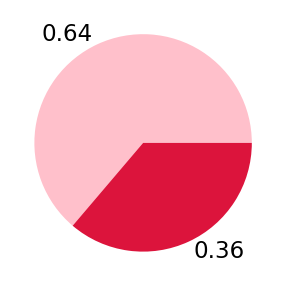

---------------------


In [155]:
for i in [4, 6]:
    plt.figure(figsize = (5, 5))
    plt.pie(av[[i, i+1]], labels = [np.round(av[i], decimals = 2), np.round(av[i+1], decimals = 2)], colors = ['pink', 'crimson'], textprops={'fontsize': 23})
    plt.show()
    print("---------------------")

In [ ]:
plt.pie()

## Age findings:


In [89]:
df.shape

(69972, 14)

In [78]:
le = LabelEncoder()
age_cat_encoded = le.fit_transform(df.age_cats)
print(len(age_cat_encoded))

69972


In [29]:
# # labeling age category
# age_catss = []
# for age_cat in df.age_cats:
#     if age_cat == '(37.0, 44.0]':
#         age_catss.append(0)         
#     elif age_cat == '(44.0, 51.0]':
#         age_catss.append(1) 
#     elif age_cat == '(51.0, 58.0]':
#         age_catss.append(2) 
#     elif age_cat == '(58.0, 65.0]':
#         age_catss.append(3) 

In [79]:
pd.Series(age_cat_encoded).value_counts()

# 0: (37.0, 44.0]  |  1: (44.0, 51.0]  | 2: (51.0, 58.0]  | 3: (58.0, 65.0]

2    24639
3    20769
1    16743
0     7821
dtype: int64

In [80]:
df.age_cats.value_counts()

(51.0, 58.0]    24639
(58.0, 65.0]    20769
(44.0, 51.0]    16743
(37.0, 44.0]     7821
(30.0, 37.0]        0
Name: age_cats, dtype: int64

In [81]:
df.insert(3, 'age_en', age_cat_encoded)

In [82]:
df.head()

,age,years,age_cats,age_en,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,100,60,1,1,0,0,0,0


In [173]:
# df.to_csv('df_age.csv', index = False)
# pd.read_csv('df_age.csv').head()

,age,years,age_cats,age_en,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,100,60,1,1,0,0,0,0


# Gender column

In [156]:
for i, data in df.iterrows():
    if data.gender == 2: # men
        df.at[i,  'gender'] = 0

In [504]:
gv = df.gender.value_counts(normalize = True)  # 1: women and 0: men
gv

1    0.652227
0    0.347773
Name: gender, dtype: float64

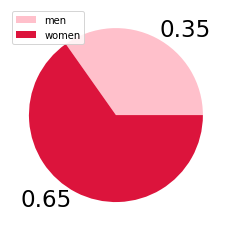

In [506]:
plt.figure(figsize = (4, 4))
plt.pie(gv[[0, 1]], labels = [np.round(gv[0], decimals = 2), np.round(gv[1], decimals = 2)], colors = ['pink', 'crimson'], textprops={'fontsize': 23})
plt.legend(['men', 'women'], loc = "upper left", fontsize = 10)

## We note that the proportion of women in the dataset is more than men.
women: 45,506

men: 24,466

In [111]:
cardio.gender.value_counts()

1    22610
2    12362
Name: gender, dtype: int64

In [112]:
df.gender.value_counts()

1    45506
0    24466
Name: gender, dtype: int64

In [113]:
cardio = df[df.cardio == 1]

In [115]:
# percentage of women who have disease 
cardio.gender.value_counts()[1]/df.gender.value_counts()[1]

0.4968575572451984

In [117]:
# percentage of men who have disease 
cardio.gender.value_counts()[0]/df.gender.value_counts()[0]

0.5052726232322406

In [177]:
df.groupby('gender').cardio.value_counts(normalize=True)

gender  cardio
0       1         0.505273
        0         0.494727
1       0         0.503142
        1         0.496858
Name: cardio, dtype: float64

## Hence no significant difference between men and women. Men and women are equally likely to suffer from cardiovascular disease.

# Height 

In [193]:
df.height.describe()

count    69969.000000
mean       164.342952
std          8.160873
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        186.000000
Name: height, dtype: float64

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

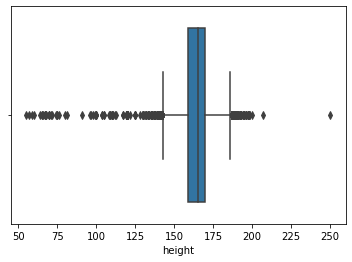

In [179]:
sns.boxplot(df.height)

In [181]:
# IQR strategy 
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
df3 = df[(df.height > r_whisker) | (df.height < l_whisker)] 
df3

,age,years,age_cats,age_en,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
62,20330,55.70,"(51.0, 58.0]",2,0,187,115.0,130,90,1,1,0,1,1,0
76,20397,55.88,"(51.0, 58.0]",2,0,188,105.0,120,80,1,1,0,0,1,1
224,21800,59.73,"(58.0, 65.0]",3,0,76,55.0,120,80,1,1,0,0,1,0
249,18220,49.92,"(44.0, 51.0]",1,1,142,61.0,120,80,1,1,0,0,1,0
781,23301,63.84,"(58.0, 65.0]",3,1,141,60.0,120,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69430,19040,52.16,"(51.0, 58.0]",2,1,140,52.0,150,80,2,1,0,0,1,1
69475,19261,52.77,"(51.0, 58.0]",2,0,187,73.0,120,80,1,3,0,0,1,0
69589,18286,50.10,"(44.0, 51.0]",1,0,192,83.0,110,70,1,1,0,1,0,0
69784,17541,48.06,"(44.0, 51.0]",1,1,141,44.0,100,70,1,1,0,0,1,0


In [182]:
df3.height.describe()

count    519.000000
mean     158.838150
std       35.879098
min       55.000000
25%      137.000000
50%      187.000000
75%      189.000000
max      250.000000
Name: height, dtype: float64

In [183]:
print('Q1: ', Q1)
print('Q2 (median): ', df.height.median())
print('Q3: ', Q3)

print('Left whisker: ', l_whisker)
print('Right whisker: ', r_whisker)

print('max: ', df.height.max())
print('min: ', df.height.min())

print('Mean: ', df.height.mean())

print('Number of outliers detected: ', len(df3))

Q1:  159.0
Q2 (median):  165.0
Q3:  170.0
Left whisker:  142.5
Right whisker:  186.5
max:  250
min:  55
Mean:  164.35898645172355
Number of outliers detected:  519


In [184]:
df[df.height > r_whisker].height.describe()

count    269.000000
mean     189.929368
std        4.941319
min      187.000000
25%      187.000000
50%      189.000000
75%      190.000000
max      250.000000
Name: height, dtype: float64

In [185]:
df[df.height > 198.12].height.describe() # people with height greater than 6.5

count      3.000000
mean     219.000000
std       27.073973
min      200.000000
25%      203.500000
50%      207.000000
75%      228.500000
max      250.000000
Name: height, dtype: float64

In [186]:
df.drop(index = df[df.height > 198.12].index, inplace = True) # dropping all those taller than 6'5

In [187]:
for i, data in df.iterrows():
    if data['height'] > r_whisker:
        df.at[i, 'height'] = r_whisker 

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

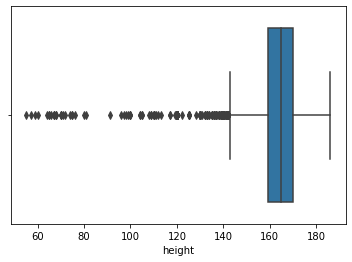

In [183]:
sns.boxplot(df.height)

In [184]:
df[df.height < l_whisker].height.describe()

count    250.000000
mean     125.384000
std       21.994444
min       55.000000
25%      120.000000
50%      136.000000
75%      140.000000
max      142.000000
Name: height, dtype: float64

In [185]:
df[df.height < 137.16].height.describe() 

count    137.000000
mean     112.927007
std       23.210873
min       55.000000
25%      105.000000
50%      120.000000
75%      130.000000
max      137.000000
Name: height, dtype: float64

In [186]:
# dropping people with height less than 4'5
df.drop(index = df[df.height < 137.16].index, inplace = True)

In [193]:
l_whisker

142.5

In [ ]:
for i, data in df.iterrows():
    if data['height'] < l_whisker:
        df.at[i, 'height'] = l_whisker 

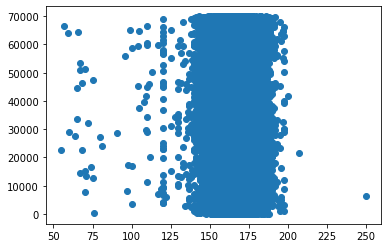

In [74]:
plt.scatter(df.height, df.index) # before

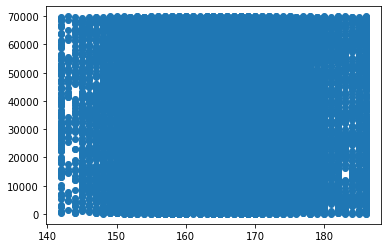

In [202]:
plt.scatter(df.height, df.index) # after  

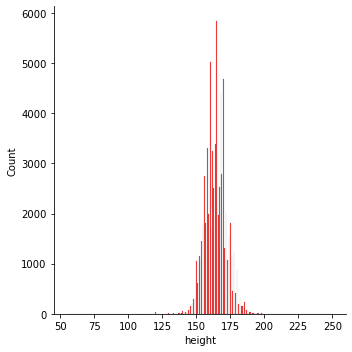

In [75]:
sns.displot(df, x="height", color = 'red')

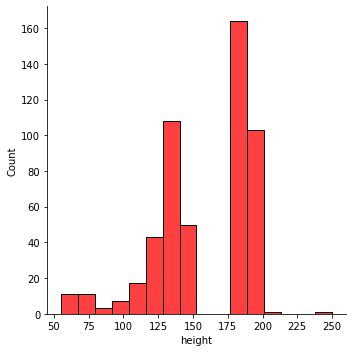

In [76]:
# OUTLIER ANALYSIS 

sns.displot(df3, x="height", color = 'red')

In [203]:
df.shape

(69832, 15)

In [212]:
df.to_csv('df_height.csv')

# Weight 

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

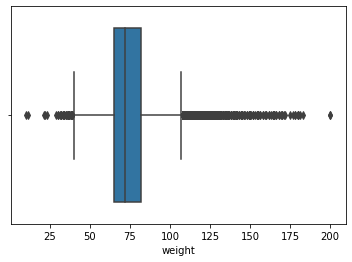

In [204]:
sns.boxplot(df.weight)

In [205]:
# IQR strategy 
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
dfw = df[(df.weight > r_whisker) | (df.weight < l_whisker)] 
dfw

,age,years,age_cats,age_en,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
15,16782,45.98,"(44.0, 51.0]",1,0,172,112.0,120,80,1,1,0,0,0,1
62,20330,55.70,"(51.0, 58.0]",2,0,186,115.0,130,90,1,1,0,1,1,0
83,19570,53.62,"(51.0, 58.0]",2,1,152,110.0,160,90,1,1,0,0,1,1
196,22675,62.12,"(58.0, 65.0]",3,1,176,108.0,140,90,1,1,0,0,0,0
267,17460,47.84,"(44.0, 51.0]",1,1,165,115.0,150,100,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,19736,54.07,"(51.0, 58.0]",2,0,186,108.0,130,80,2,2,0,1,0,1
69946,21333,58.45,"(58.0, 65.0]",3,1,164,115.0,130,80,1,1,0,0,1,1
69947,23305,63.85,"(58.0, 65.0]",3,0,172,113.0,110,80,1,1,0,0,0,1
69981,17500,47.95,"(44.0, 51.0]",1,0,182,110.0,130,90,2,2,0,0,1,1


In [206]:
print('Q1: ', Q1)
print('Q2 (median): ', df.weight.median())
print('Q3: ', Q3)

print('Left whisker: ', l_whisker)
print('Right whisker: ', r_whisker)

print('max: ', df.weight.max())
print('min: ', df.weight.min())

print('Mean: ', df.weight.mean())

print('Number of outliers detected: ', len(dfw))

Q1:  65.0
Q2 (median):  72.0
Q3:  82.0
Left whisker:  39.5
Right whisker:  107.5
max:  200.0
min:  10.0
Mean:  74.20293991293391
Number of outliers detected:  1803


In [208]:
l_whisker

39.5

In [211]:
df[df.weight < l_whisker].shape

(47, 15)

In [213]:
# dropping absurd weights lower than 39.5 kgs
df.drop(index = df[df.weight < l_whisker].index, inplace = True)

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

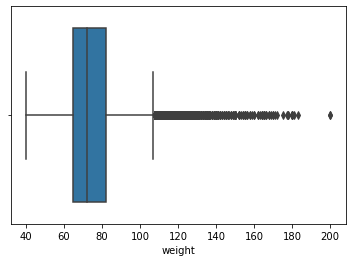

In [214]:
sns.boxplot(df.weight)

In [217]:
r_whisker

107.5

In [216]:
df[df.weight > r_whisker].weight.describe()

count    1756.000000
mean      118.490831
std        12.116575
min       108.000000
25%       110.000000
50%       115.000000
75%       122.000000
max       200.000000
Name: weight, dtype: float64

In [220]:
df[df.weight > 115].shape

(788, 15)

In [221]:
df.drop(index = df[df.weight > 115].index, inplace = True) # since beyond this variation high -- 1% of the data 

In [224]:
r_whisker

107.5

In [225]:
for i, data in df.iterrows():
    if data['weight'] > r_whisker:
        df.at[i, 'weight'] = r_whisker 

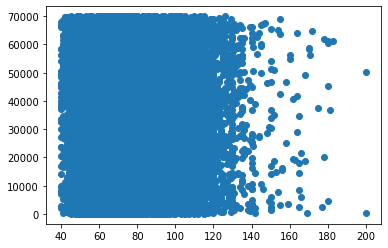

In [218]:
plt.scatter(df.weight, df.index)   # before

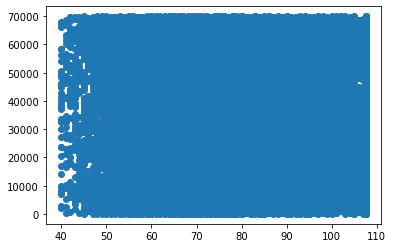

In [226]:
plt.scatter(df.weight, df.index) # after 

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

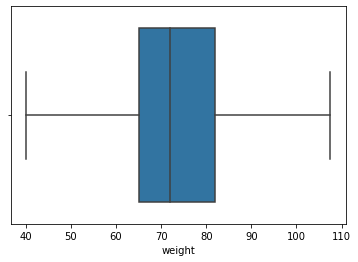

In [228]:
sns.boxplot(df.weight)

In [229]:
df.to_csv('df_weight.csv')

In [230]:
df.shape

(68997, 15)

## Adding a BMI column using the height and weight data columns 

In [231]:
df.shape

(68997, 15)

In [239]:
bmi = []
for i, data in df.iterrows():
    x = data['weight'] / ((data['height']/100)**2) 
    bmi.append(np.round(x, decimals = 2))
    
df.insert(7, 'bmi', bmi)

In [240]:
df.head()

,Unnamed: 0,age,years,age_cats,age_en,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.39,"(44.0, 51.0]",1,0,168,21.97,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.42,"(51.0, 58.0]",2,1,156,34.93,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.66,"(51.0, 58.0]",2,1,165,23.51,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.28,"(44.0, 51.0]",1,0,169,28.71,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.87,"(44.0, 51.0]",1,1,156,23.01,56.0,100,60,1,1,0,0,0,0


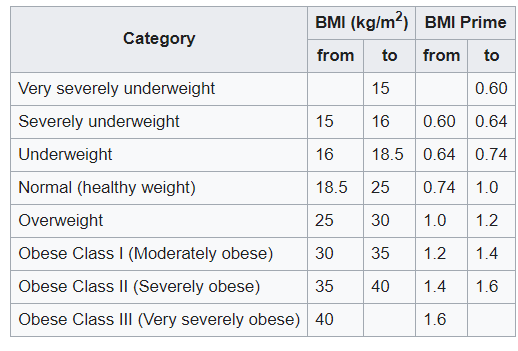

In [94]:
Image('Screenshot (464).png')

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

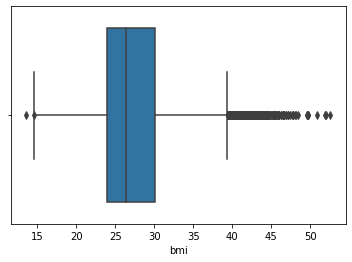

In [235]:
sns.boxplot(df.bmi)

In [241]:
# IQR strategy 
Q1 = Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
dfb = df[(df.bmi > r_whisker) | (df.bmi < l_whisker)] 
dfb

,Unnamed: 0,age,years,age_cats,age_en,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30,30,18291,50.11,"(44.0, 51.0]",1,1,155,43.70,105.0,120,80,3,1,0,0,1,1
46,46,18207,49.88,"(44.0, 51.0]",1,1,162,40.77,107.0,150,90,2,1,0,0,1,1
83,83,19570,53.62,"(51.0, 58.0]",2,1,152,46.53,107.5,160,90,1,1,0,0,1,1
88,88,23204,63.57,"(58.0, 65.0]",3,1,151,40.35,92.0,130,90,1,1,0,0,0,1
212,212,22570,61.84,"(58.0, 65.0]",3,1,162,40.01,105.0,140,90,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68561,69563,14617,40.05,"(37.0, 44.0]",0,1,161,40.51,105.0,120,80,1,1,0,0,1,1
68586,69588,18864,51.68,"(51.0, 58.0]",2,1,155,42.04,101.0,140,80,3,2,0,0,1,1
68706,69708,21357,58.51,"(58.0, 65.0]",3,1,144,51.84,107.5,140,90,1,1,0,1,0,1
68944,69946,21333,58.45,"(58.0, 65.0]",3,1,164,39.97,107.5,130,80,1,1,0,0,1,1


In [243]:
print('Q1: ', Q1)
print('Q2 (median): ', df.bmi.median())
print('Q3: ', Q3)

print('Left whisker: ', l_whisker)
print('Right whisker: ', r_whisker)

print('mean: ', df.bmi.mean())

print('max: ', df.bmi.max())
print('min: ', df.bmi.min())

print('Number of outliers detected: ', len(dfb))

Q1:  23.88
Q2 (median):  26.3
Q3:  30.08
Left whisker:  14.58
Right whisker:  39.379999999999995
mean:  27.258921982114092
max:  52.57
min:  13.52
Number of outliers detected:  1323


In [245]:
df[df.bmi < l_whisker].shape

(2, 17)

In [247]:
df[df.bmi > r_whisker].bmi.describe()

count    1321.000000
mean       41.659069
std         1.960714
min        39.390000
25%        40.060000
50%        41.090000
75%        42.740000
max        52.570000
Name: bmi, dtype: float64

In [248]:
df[df.bmi >  42.74 ].bmi.describe()

count    330.000000
mean      44.438697
std        1.584068
min       42.790000
25%       43.280000
50%       44.170000
75%       45.092500
max       52.570000
Name: bmi, dtype: float64

In [249]:
df[df.bmi >  45 ].bmi.describe()

count    84.000000
mean     46.534881
std       1.675091
min      45.010000
25%      45.330000
50%      45.920000
75%      46.712500
max      52.570000
Name: bmi, dtype: float64

In [254]:
df[(df.bmi < l_whisker) | (df.bmi > 45)].shape

(86, 17)

In [255]:
df.drop(index = df[(df.bmi < l_whisker) | (df.bmi > 45)].index, inplace = True)

In [257]:
for i, data in df.iterrows():
    if data['bmi'] > r_whisker:
        df.at[i, 'bmi'] = r_whisker 

In [258]:
df.shape

(68911, 17)

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

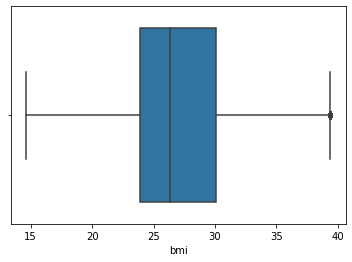

In [260]:
sns.boxplot(df.bmi)

In [261]:
# IQR strategy 
Q1 = Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
df_bmi_ = df[(df.bmi > r_whisker) | (df.bmi < l_whisker)] 
df_bmi_

,Unnamed: 0,age,years,age_cats,age_en,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30,30,18291,50.11,"(44.0, 51.0]",1,1,155,39.38,105.0,120,80,3,1,0,0,1,1
46,46,18207,49.88,"(44.0, 51.0]",1,1,162,39.38,107.0,150,90,2,1,0,0,1,1
88,88,23204,63.57,"(58.0, 65.0]",3,1,151,39.38,92.0,130,90,1,1,0,0,0,1
212,212,22570,61.84,"(58.0, 65.0]",3,1,162,39.38,105.0,140,90,3,1,0,0,0,1
260,261,21059,57.70,"(51.0, 58.0]",2,1,154,39.38,98.0,140,90,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68405,69406,18435,50.51,"(44.0, 51.0]",1,1,156,39.38,99.9,120,80,1,1,0,0,1,0
68561,69563,14617,40.05,"(37.0, 44.0]",0,1,161,39.38,105.0,120,80,1,1,0,0,1,1
68586,69588,18864,51.68,"(51.0, 58.0]",2,1,155,39.38,101.0,140,80,3,2,0,0,1,1
68944,69946,21333,58.45,"(58.0, 65.0]",3,1,164,39.38,107.5,130,80,1,1,0,0,1,1


In [263]:
bmi_rounded = []
for i in df.bmi:
    r = np.round(i, decimals = 0)
    bmi_rounded.append(int(r))
len(bmi_rounded)

68911

In [274]:
df.drop('bmi', axis = 1, inplace = True)

In [275]:
df.insert(7, 'bmi', bmi_rounded)
df.head()

,age,years,age_cats,age_en,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,110,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,140,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,130,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,150,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,100,60,1,1,0,0,0,0


C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

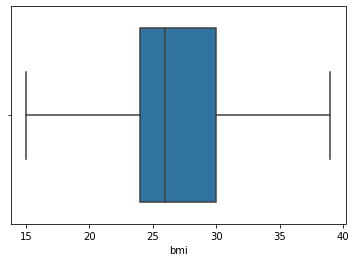

In [272]:
sns.boxplot(df.bmi)

In [136]:
# bmi_cats = []
# for i, data in df.iterrows():
#     if data.bmi <= 18.5:
#         bmi_cats.append(0) # underweight
#     if 18.5 < data.bmi <= 25:
#         bmi_cats.append(1) # normal weight / healthy
#     if 25 < data.bmi <= 30:
#         bmi_cats.append(2) # overweight
#     if 30 < data.bmi <= 35:
#         bmi_cats.append(3) # Obese class 1 (moderately obese)
#     if 35 < data.bmi <= 40:
#         bmi_cats.append(4) # Obese class 2 (severly obese )
#     if data.bmi > 40:
#         bmi_cats.append(5) # Obese class 3 (very severly obese)

In [137]:
# df.insert(8, 'bmi_cats', bmi_cats)

In [273]:
# df.head()

,age,years,age_cats,age_en,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,110,22,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,140,35,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,130,24,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,150,29,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,100,23,60,1,1,0,0,0,0


In [141]:
# df.bmi_cats.value_counts()

1    25755
2    25102
3    12231
4     4371
5     1872
0      641
Name: bmi_cats, dtype: int64

In [144]:
# df.groupby('bmi_cats').cardio.value_counts(normalize = True)

bmi_cats  cardio
0         0         0.722309
          1         0.277691
1         0         0.598641
          1         0.401359
2         1         0.510119
          0         0.489881
3         1         0.604366
          0         0.395634
4         1         0.679707
          0         0.320293
5         1         0.688568
          0         0.311432
Name: cardio, dtype: float64

In [276]:
# clubbing all classes for obese since segregation unnecessary 
bmi_cats = []
for i, data in df.iterrows():
    if data.bmi <= 18.5:
        bmi_cats.append(0) # underweight
    elif 18.5 < data.bmi <= 25:
        bmi_cats.append(1) # normal weight / healthy
    elif 25 < data.bmi <= 30:
        bmi_cats.append(2) # overweight
    elif data.bmi > 30:
        bmi_cats.append(3) # Obese 

In [146]:
# df.drop('bmi_cats', axis = 1, inplace = True)

In [277]:
df.insert(8, 'bmi_cats', bmi_cats)

In [278]:
df.head()

,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,110,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,140,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,130,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,150,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,60,1,1,0,0,0,0


In [279]:
len(df)

68911

In [280]:
df.to_csv('df_bmi.csv')

In [194]:
d = pd.read_csv('df_bmi.csv')
bv = d.groupby('bmi_cats').cardio.value_counts(normalize = True)
bv

bmi_cats  cardio
0         0         0.736486
          1         0.263514
1         0         0.591330
          1         0.408670
2         1         0.520683
          0         0.479317
3         1         0.635918
          0         0.364082
Name: cardio, dtype: float64

In [202]:
bv[0][0]

0.7364864864864865

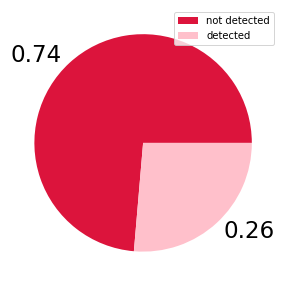

---------------------


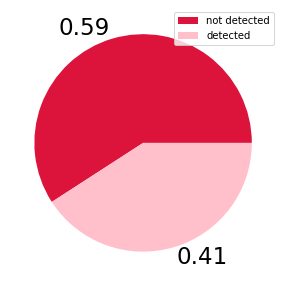

---------------------


In [205]:
for i in [0, 1]:
#     print(av[[i, i+1]])
#     plt.subplot(1, 2, )
    plt.figure(figsize = (5, 5))
    plt.pie([bv[i][0], bv[i][1]], labels = [np.round(bv[i][0], decimals = 2), np.round(bv[i][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
    plt.legend(['not detected', 'detected'], loc = "upper right", fontsize = 10)
    plt.show()
    print("---------------------")

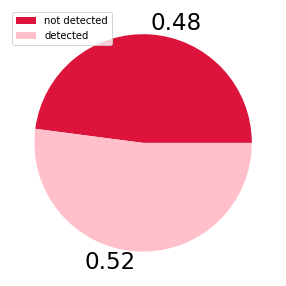

---------------------


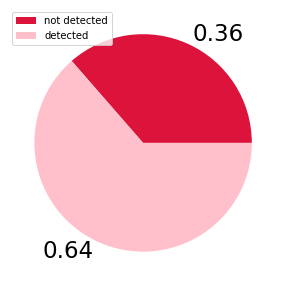

---------------------


In [207]:
for i in [2, 3]:
#     print(av[[i, i+1]])
#     plt.subplot(1, 2, )
    plt.figure(figsize = (5, 5))
    plt.pie([bv[i][0], bv[i][1]], labels = [np.round(bv[i][0], decimals = 2), np.round(bv[i][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
    plt.legend(['not detected', 'detected'], loc = "upper left", fontsize = 10)
    plt.show()
    print("---------------------")

# ap_hi: Systolic Blood Pressure 

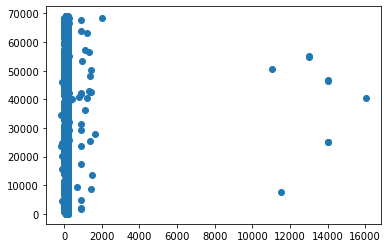

In [281]:
plt.scatter(df.ap_hi, df.index)

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_hi'>

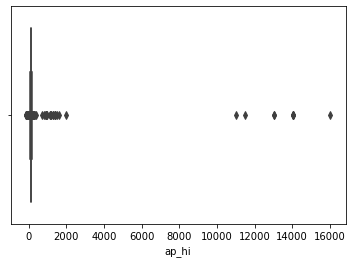

In [282]:
sns.boxplot(df.ap_hi)

In [283]:
# IQR strategy 
Q1 = Q1 = df.ap_hi.quantile(0.25)
Q3 = df.ap_hi.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
df4 = df[(df.ap_hi > r_whisker) | (df.ap_hi < l_whisker)] 
len(df4)

1361

In [284]:
print('Q1: ', Q1)
print('Q2 (median): ', df.ap_hi.median())
print('Q3: ', Q3)

print('Left whisker: ', l_whisker)
print('Right whisker: ', r_whisker)

print('mean: ', df.ap_hi.mean())

print('max: ', df.ap_hi.max())
print('min: ', df.ap_hi.min())

print('Number of outliers detected: ', len(df4))

Q1:  120.0
Q2 (median):  120.0
Q3:  140.0
Left whisker:  90.0
Right whisker:  170.0
mean:  128.69370637488936
max:  16020
min:  -150
Number of outliers detected:  1361


In [285]:
df[df.ap_hi > r_whisker].ap_hi.describe()

count     1044.000000
mean       326.361111
std       1238.338834
min        171.000000
25%        180.000000
50%        180.000000
75%        190.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [286]:
df[df.ap_hi > 180].shape

(348, 17)

In [287]:
# DROPING all values beyond 180 
df.drop(index = df[df.ap_hi > 180].index, inplace =True)

In [293]:
df[df.ap_hi > r_whisker].ap_hi.describe()

count    696.000000
mean     179.633621
std        1.538743
min      171.000000
25%      180.000000
50%      180.000000
75%      180.000000
max      180.000000
Name: ap_hi, dtype: float64

In [294]:
for i, data in df.iterrows():
    if data['ap_hi'] > r_whisker:
        df.at[i, 'ap_hi'] = r_whisker 

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_hi'>

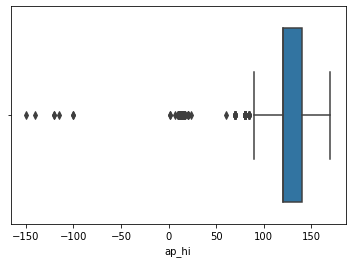

In [295]:
sns.boxplot(df.ap_hi)

In [289]:
df.shape

(68563, 17)

In [300]:
df[df.ap_hi < l_whisker].ap_hi.describe()

count    317.000000
mean      37.466877
std       40.485069
min     -150.000000
25%       12.000000
50%       14.000000
75%       80.000000
max       85.000000
Name: ap_hi, dtype: float64

In [297]:
df[df.ap_hi < 60].ap_hi.describe()

count    184.000000
mean       7.538043
std       25.907120
min     -150.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       24.000000
Name: ap_hi, dtype: float64

In [302]:
# DROPPING ALL VALUES LESS THAN 60
df.drop(index = df[df.ap_hi < 60].index, inplace =True)

In [303]:
df[df.ap_hi < l_whisker].ap_hi.describe()

count    133.000000
mean      78.872180
std        4.156801
min       60.000000
25%       80.000000
50%       80.000000
75%       80.000000
max       85.000000
Name: ap_hi, dtype: float64

In [304]:
for i, data in df.iterrows():
    if data['ap_hi'] < l_whisker:
        df.at[i, 'ap_hi'] = l_whisker 

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_hi'>

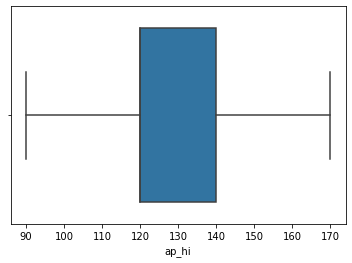

In [305]:
sns.boxplot(df.ap_hi)

In [307]:
df.to_csv('df_ap_hi.csv')

# ap_lo: diastolic blood pressure 

In [308]:
df.shape

(68379, 17)

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_lo'>

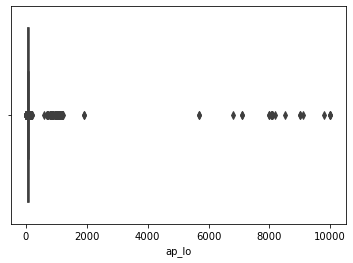

In [309]:
sns.boxplot(df.ap_lo)

In [310]:
# IQR strategy 
Q1 = Q1 = df.ap_lo.quantile(0.25)
Q3 = df.ap_lo.quantile(0.75)
IQR = Q3 - Q1

r_whisker = Q3 + 1.5*IQR
l_whisker = Q1 - 1.5 * IQR
df5 = df[(df.ap_lo > r_whisker) | (df.ap_lo < l_whisker)] 
df5

,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,60,1,1,0,0,0,0
9,19834,54.34,"(51.0, 58.0]",2,1,164,68.0,25,1,110,60,1,1,0,0,0,0
23,23376,64.04,"(58.0, 65.0]",3,0,156,45.0,18,0,110,60,1,1,0,0,1,0
43,20556,56.32,"(51.0, 58.0]",2,0,159,63.0,25,1,120,60,1,1,0,0,1,1
50,18238,49.97,"(44.0, 51.0]",1,1,160,75.0,29,2,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68927,19834,54.34,"(51.0, 58.0]",2,1,164,85.0,32,3,165,110,3,3,0,0,1,1
68930,15243,41.76,"(37.0, 44.0]",0,0,171,67.0,23,1,110,60,1,1,0,0,1,0
68935,14489,39.70,"(37.0, 44.0]",0,1,160,53.0,21,1,90,60,1,1,0,0,1,0
68965,21416,58.67,"(58.0, 65.0]",3,0,168,63.0,22,1,140,1000,1,1,0,0,1,1


In [311]:
print('Q1: ', Q1)
print('Q2 (median): ', df.ap_lo.median())
print('Q3: ', Q3)

print('Left whisker: ', l_whisker)
print('Right whisker: ', r_whisker)

print('max: ', df.ap_lo.max())
print('min: ', df.ap_lo.min())

print('Number of outliers detected: ', len(df5))

Q1:  80.0
Q2 (median):  80.0
Q3:  90.0
Left whisker:  65.0
Right whisker:  105.0
max:  10000
min:  0
Number of outliers detected:  4308


In [318]:
df.drop(index = df[(df.ap_lo < 40) | (df.ap_lo > 120)].index, inplace = True)

In [320]:
df[df.ap_lo < l_whisker].ap_lo.describe()

count    2827.000000
mean       59.671383
std         2.115032
min        40.000000
25%        60.000000
50%        60.000000
75%        60.000000
max        64.000000
Name: ap_lo, dtype: float64

In [321]:
df[df.ap_lo < 60].ap_lo.describe()

count    113.000000
mean      51.070796
std        5.733231
min       40.000000
25%       50.000000
50%       50.000000
75%       56.000000
max       59.000000
Name: ap_lo, dtype: float64

In [324]:
df.drop(index = df[df.ap_lo < 60].index, inplace = True)

In [329]:
l_whisker

65.0

In [330]:
for i, data in df.iterrows():
    if data['ap_lo'] < l_whisker:
        df.at[i, 'ap_lo'] = l_whisker 

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_lo'>

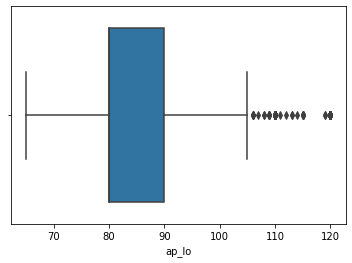

In [331]:
sns.boxplot(df.ap_lo)

In [333]:
df.shape

(67288, 17)

In [332]:
df[df.ap_lo > r_whisker].ap_lo.describe()

count    503.000000
mean     112.988072
std        4.614184
min      106.000000
25%      110.000000
50%      110.000000
75%      120.000000
max      120.000000
Name: ap_lo, dtype: float64

In [334]:
df.drop(index = df[df.ap_lo > r_whisker].index, inplace = True)

In [335]:
df.shape

(66785, 17)

In [336]:
df.to_csv('df_ap_lo.csv')

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_lo'>

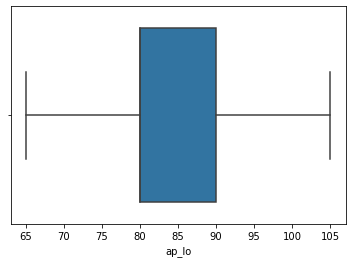

In [337]:
sns.boxplot(df.ap_lo)

# Categorizing Blood Pressure Values 

In [195]:
# bp_cats = []
# for i, data in df.iterrows():
#     if data.ap_hi < 120 and data.ap_lo < 80:
#         bp_cats.append(0)  # optimum 
        
#     elif 120 <= data.ap_hi <= 129 and 80 <= data.ap_lo <= 84:
#         bp_cats.append(1)  # normal 
        
#     elif 130 <= data.ap_hi <= 139 and 85 <= data.ap_lo <= 89:
#         bp_cats.append(2) # high normal 
        
#     elif 140 <= data.ap_hi <= 159 and 90 <= data.ap_lo <= 99:
#         bp_cats.append(3)  # grade 1 hypertension
        
#     elif 160 <= data.ap_hi <= 179 and 100 <= data.ap_lo <= 109:
#         bp_cats.append(4)  # grade 2 hypertension
        
#     elif data.ap_hi >= 180 and data.ap_lo >= 110:
#         bp_cats.append(5)  # grade 3 hypertension
        
#     elif data.ap_hi >= 140 and data.ap_lo < 90:
#         bp_cats.append(6)  # Isolated systolic hypertension
        
# len(bp_cats)       

47682

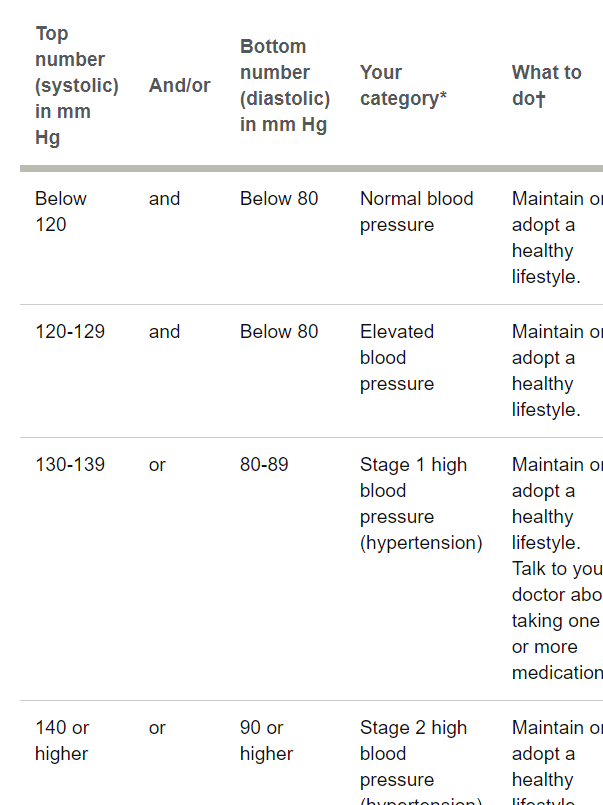

In [200]:
Image('Screenshot (466).png') 

In [360]:
df_ = pd.read_csv('df_ap_lo.csv')
df_.drop('Unnamed: 0', axis=1, inplace = True)

In [361]:
bp_cats = []
for i, data in df.iterrows():
    if data.ap_hi < 120 and data.ap_lo < 80:
        bp_cats.append(0)  # normal blood pressure 
        
    elif 120 <= data.ap_hi <= 129 and data.ap_lo < 80:
        bp_cats.append(1)  # elevated blood pressure 
        
    elif 130 <= data.ap_hi <= 139 or 80 <= data.ap_lo <= 89:
        bp_cats.append(2) # stage 1 high blood pressure 
        
    elif data.ap_hi >= 140 or data.ap_lo >= 90:
        bp_cats.append(3)  # stage 2 high blood pressure 

        
len(bp_cats)    

66785

In [362]:
df.head()

,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,110,80,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,140,90,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,130,70,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,150,100,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,65,1,1,0,0,0,0


In [364]:
df.insert(11, 'bp_cats', bp_cats)
df.bp_cats.value_counts()

2    39241
3    15075
0     9394
1     3075
Name: bp_cats, dtype: int64

In [396]:
bpv = df_.groupby('bp_cats').cardio.value_counts(normalize = True)
bpv

bp_cats  cardio
0        0         0.778901
         1         0.221099
1        0         0.678049
         1         0.321951
2        0         0.553401
         1         0.446599
3        1         0.798474
         0         0.201526
Name: cardio, dtype: float64

In [397]:
bpv[0][1]

0.22109857355758994

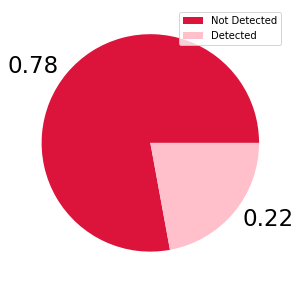

---------------------


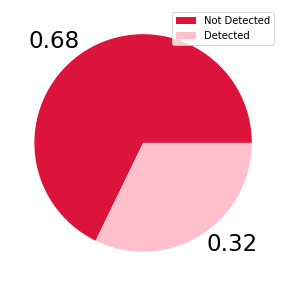

---------------------


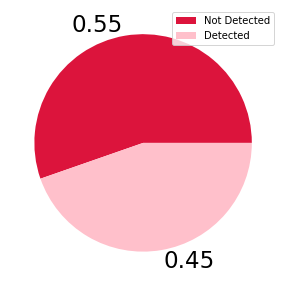

---------------------


In [399]:
for i in [0, 1, 2]:
    plt.figure(figsize = (5, 5))
    plt.pie(bpv[i], labels = [np.round(bpv[i][0], decimals = 2), np.round(bpv[i][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
    plt.legend(['Not Detected', 'Detected'], loc = "upper right", fontsize = 10)
    plt.show()
    print("---------------------")

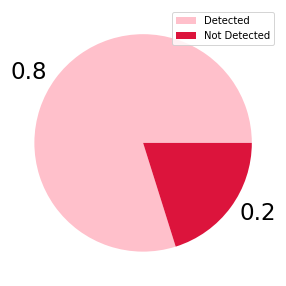

---------------------


In [408]:
plt.figure(figsize = (5, 5))
plt.pie(bpv[3], labels = [np.round(bpv[3][1], decimals = 2), np.round(bpv[3][0], decimals = 2)], colors = ['pink', 'crimson'], textprops={'fontsize': 23})
plt.legend(['Detected', 'Not Detected'], loc = "upper right", fontsize = 10)
plt.show()
print("---------------------")

# Cholesterol

In [343]:
df.head()

,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,bp_cats,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,110,80,2,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,140,90,3,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,130,70,2,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,150,100,3,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,65,0,1,1,0,0,0,0


In [345]:
df.cholesterol.value_counts() # 1: normal, 2: above normal, 3: well above normal

1    50377
2     8904
3     7504
Name: cholesterol, dtype: int64

In [410]:
cv = df_.groupby('cholesterol').cardio.value_counts(normalize = True)
cv

cholesterol  cardio
1            0         0.569506
             1         0.430494
2            1         0.589061
             0         0.410939
3            1         0.759195
             0         0.240805
Name: cardio, dtype: float64

In [414]:
cv[1][[0, 1]]

cardio
0    0.569506
1    0.430494
Name: cardio, dtype: float64

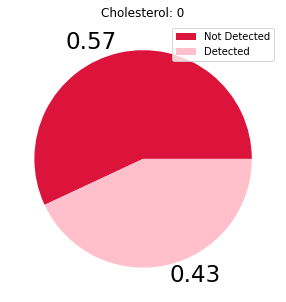

---------------------


In [421]:
plt.figure(figsize = (5, 5))
plt.pie(cv[1][[0, 1]], labels = [np.round(cv[1][0], decimals = 2), np.round(cv[1][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
plt.legend(['Not Detected', 'Detected'], loc = "upper right", fontsize = 10)
plt.title('Cholesterol: 0')
plt.show()
print("---------------------")

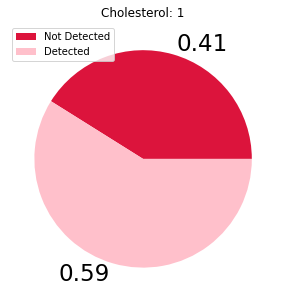

---------------------


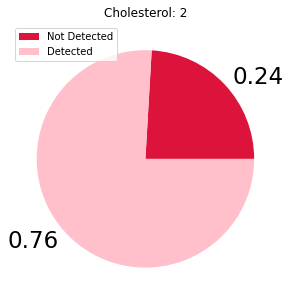

---------------------


In [422]:
for i in [2, 3]:
    plt.figure(figsize = (5, 5))
    plt.pie(cv[i][[0, 1]], labels = [np.round(cv[i][0], decimals = 2), np.round(cv[i][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
    plt.legend(['Not Detected', 'Detected'], loc = "upper left", fontsize = 10)
    if i == 2:
        plt.title('Cholesterol: 1')
    else:
        plt.title('Cholesterol: 2')
    plt.show()
    print("---------------------")

# Glucose 

In [347]:
df.gluc.value_counts() # 1: normal, 2: above normal, 3: well above normal

1    56995
3     5004
2     4786
Name: gluc, dtype: int64

In [426]:
gv = df.groupby('gluc').cardio.value_counts(normalize = True)
gv

gluc  cardio
1     0         0.529766
      1         0.470234
2     1         0.577727
      0         0.422273
3     1         0.612110
      0         0.387890
Name: cardio, dtype: float64

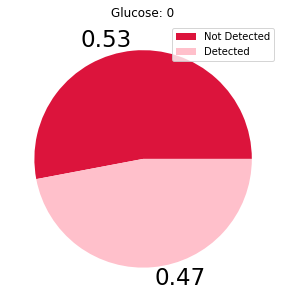

---------------------


In [429]:
plt.figure(figsize = (5, 5))
plt.pie(gv[1][[0, 1]], labels = [np.round(gv[1][0], decimals = 2), np.round(gv[1][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
plt.legend(['Not Detected', 'Detected'], loc = "upper right", fontsize = 10)
plt.title('Glucose: 0')
plt.show()
print("---------------------")

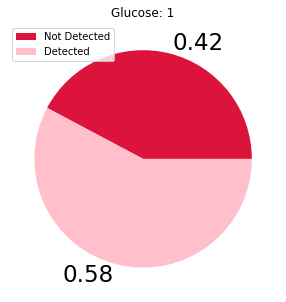

---------------------


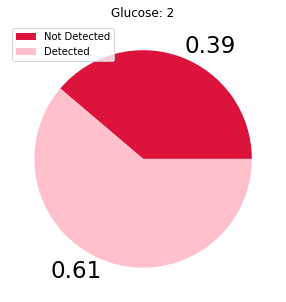

---------------------


In [430]:
for i in [2, 3]:
    plt.figure(figsize = (5, 5))
    plt.pie(gv[i][[0, 1]], labels = [np.round(gv[i][0], decimals = 2), np.round(gv[i][1], decimals = 2)], colors = ['crimson', 'pink'], textprops={'fontsize': 23})
    plt.legend(['Not Detected', 'Detected'], loc = "upper left", fontsize = 10)
    if i == 2:
        plt.title('Glucose: 1')
    else:
        plt.title('Glucose: 2')
    plt.show()
    print("---------------------")

In [349]:
df.groupby('cholesterol').gluc.value_counts(normalize = True)

cholesterol  gluc
1            1       0.930186
             2       0.041646
             3       0.028168
2            1       0.709906
             2       0.251011
             3       0.039084
3            1       0.508262
             3       0.431370
             2       0.060368
Name: gluc, dtype: float64

In [350]:
df.groupby(['cholesterol', 'gluc']).cardio.value_counts(normalize = True)

cholesterol  gluc  cardio
1            1     0         0.574563
                   1         0.425437
             2     1         0.526692
                   0         0.473308
             3     0         0.544750
                   1         0.455250
2            1     1         0.592153
                   0         0.407847
             2     1         0.579418
                   0         0.420582
             3     1         0.594828
                   0         0.405172
3            1     1         0.818563
                   0         0.181437
             2     1         0.805740
                   0         0.194260
             3     1         0.682731
                   0         0.317269
Name: cardio, dtype: float64

# Smoke

In [351]:
df.smoke.value_counts()

0    60961
1     5824
Name: smoke, dtype: int64

In [352]:
df.groupby('smoke').cardio.value_counts(normalize = True)

smoke  cardio
0      0         0.508538
       1         0.491462
1      0         0.541724
       1         0.458276
Name: cardio, dtype: float64

# Alco

In [353]:
df.alco.value_counts()

0    63270
1     3515
Name: alco, dtype: int64

In [354]:
df.groupby('alco').cardio.value_counts(normalize = True)

alco  cardio
0     0         0.510163
      1         0.489837
1     0         0.534282
      1         0.465718
Name: cardio, dtype: float64

In [355]:
df.groupby('alco').smoke.value_counts(normalize = True)

alco  smoke
0     0        0.935483
      1        0.064517
1     0        0.504410
      1        0.495590
Name: smoke, dtype: float64

In [356]:
df.groupby(['alco', 'smoke']).cardio.value_counts(normalize = True)

alco  smoke  cardio
0     0      0         0.508887
             1         0.491113
      1      0         0.528662
             1         0.471338
1     0      1         0.503102
             0         0.496898
      1      0         0.572331
             1         0.427669
Name: cardio, dtype: float64

# Active 

In [357]:
df.active.value_counts()

1    53677
0    13108
Name: active, dtype: int64

In [431]:
df.groupby('active').cardio.value_counts(normalize = True)

active  cardio
0       1         0.526854
        0         0.473146
1       0         0.520782
        1         0.479218
Name: cardio, dtype: float64

In [359]:
df.groupby('active').cholesterol.value_counts(normalize = True)

active  cholesterol
0       1              0.758544
        2              0.137550
        3              0.103906
1       1              0.753284
        2              0.132291
        3              0.114425
Name: cholesterol, dtype: float64

In [360]:
df.groupby('active').gluc.value_counts(normalize = True)

active  gluc
0       1       0.846048
        2       0.077510
        3       0.076442
1       1       0.855208
        3       0.074557
        2       0.070235
Name: gluc, dtype: float64

# FEATURE SELECTION

In [208]:
df = pd.read_csv('df_final.csv')
df.head()

,Unnamed: 0,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,bp_cats,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,110,80,2,1,1,0,0,1,0
1,1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,140,90,3,3,1,0,0,1,1
2,2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,130,70,2,3,1,0,0,0,1
3,3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,150,100,3,1,1,0,0,1,1
4,4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,65,0,1,1,0,0,0,0


In [209]:
df.shape

(66785, 19)

In [212]:
old_df = df
old_df.head()

,Unnamed: 0,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,bp_cats,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,110,80,2,1,1,0,0,1,0
1,1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,140,90,3,3,1,0,0,1,1
2,2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,130,70,2,3,1,0,0,0,1
3,3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,150,100,3,1,1,0,0,1,1
4,4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,65,0,1,1,0,0,0,0


In [214]:
df = old_df.drop(['age', 'age_cats', 'age_en', 'height', 'weight', 'bmi_cats', 'bp_cats'], axis = 1)
df.head()

,Unnamed: 0,years,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.39,0,22,110,80,1,1,0,0,1,0
1,1,55.42,1,35,140,90,3,1,0,0,1,1
2,2,51.66,1,24,130,70,3,1,0,0,0,1
3,3,48.28,0,29,150,100,1,1,0,0,1,1
4,4,47.87,1,23,100,65,1,1,0,0,0,0


In [226]:
# One hot encoding
old_df_en = pd.concat([old_df, pd.get_dummies(old_df['age_en'], prefix = 'age'), 
                   pd.get_dummies(old_df['bmi_cats'], prefix = 'bmi'), 
                   pd.get_dummies(old_df['bp_cats'], prefix = 'bp'), 
                   pd.get_dummies(old_df['cholesterol'], prefix = 'chol'), 
                   pd.get_dummies(old_df['gluc'], prefix = 'gluc')], axis = 1)
old_df_en

,Unnamed: 0,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,...,bp_0,bp_1,bp_2,bp_3,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
0,0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,...,0,0,1,0,1,0,0,1,0,0
1,1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,...,0,0,0,1,0,0,1,1,0,0
2,2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,...,0,0,1,0,0,0,1,1,0,0
3,3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,...,0,0,0,1,1,0,0,1,0,0
4,4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66780,68992,21074,57.74,"(51.0, 58.0]",2,1,165,80.0,29,2,...,0,0,1,0,1,0,0,1,0,0
66781,68993,19240,52.71,"(51.0, 58.0]",2,0,168,76.0,27,2,...,0,0,1,0,1,0,0,1,0,0
66782,68994,19066,52.24,"(51.0, 58.0]",2,0,183,105.0,31,3,...,0,0,0,1,0,0,1,1,0,0
66783,68995,22431,61.45,"(58.0, 65.0]",3,1,163,72.0,27,2,...,0,0,1,0,1,0,0,0,1,0


In [219]:
# Scaling 

sc = MinMaxScaler()

df[['years', 'ap_hi','ap_lo','bmi']] = sc.fit_transform(df[['years', 'ap_hi','ap_lo','bmi']])
# norm_x_train = pd.DataFrame(X_train_n, columns = X_train.columns)
# norm_x_train.head()
df.head()

,Unnamed: 0,years,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.435977,0,0.291667,0.250,0.375,1,1,0,0,1,0
1,1,0.630561,1,0.833333,0.625,0.625,3,1,0,0,1,1
2,2,0.485106,1,0.375000,0.500,0.125,3,1,0,0,0,1
3,3,0.354352,0,0.583333,0.750,0.875,1,1,0,0,1,1
4,4,0.338491,1,0.333333,0.125,0.000,1,1,0,0,0,0


In [227]:
X = df.drop('cardio', axis = 1)
y = df['cardio']
X.head()

,Unnamed: 0,years,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,0.435977,0,0.291667,0.250,0.375,1,1,0,0,1
1,1,0.630561,1,0.833333,0.625,0.625,3,1,0,0,1
2,2,0.485106,1,0.375000,0.500,0.125,3,1,0,0,0
3,3,0.354352,0,0.583333,0.750,0.875,1,1,0,0,1
4,4,0.338491,1,0.333333,0.125,0.000,1,1,0,0,0


<AxesSubplot:>

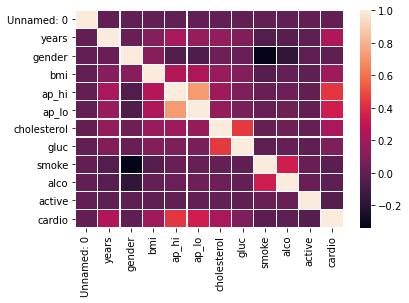

In [220]:
sns.heatmap(df.corr(), linewidth = 0.2) # without annot parameter

# Train and test splits: Continuous variables 

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Categorical Data 

In [261]:
XX = old_df.drop(['age', 'years', 'age_cats', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo'], axis = 1)
XX.head()

,Unnamed: 0,age_en,gender,bmi_cats,bp_cats,cholesterol,gluc,smoke,alco,active,cardio
0,0,1,0,1,2,1,1,0,0,1,0
1,1,2,1,3,3,3,1,0,0,1,1
2,2,2,1,1,2,3,1,0,0,0,1
3,3,1,0,2,3,1,1,0,0,1,1
4,4,1,1,1,0,1,1,0,0,0,0


In [268]:
XX.shape

(66785, 11)

In [276]:
XX.drop(['Unnamed: 0', 'cardio'], axis = 1, inplace = True)

In [277]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y, test_size = 0.2, random_state = 1)

In [278]:
XX_train.shape

(53428, 9)

# Feature Selection

In [246]:
f_score = chi2(X_train, y_train)
f_score # prints 2 blocks of arrays 

(array([3.86359895e+02, 1.59427902e-01, 1.41731839e+02, 8.33371851e+02,
        6.86247993e+02, 8.64858970e+02, 1.05575131e+02, 1.94807012e+01,
        6.10231001e+00, 1.55595511e+01]),
 array([5.13265369e-086, 6.89683780e-001, 1.11305501e-032, 2.99642243e-183,
        2.92557155e-151, 4.27787021e-190, 9.13672022e-025, 1.01621223e-005,
        1.35005291e-002, 7.99467422e-005]))

In [444]:
XX_train.columns

Index(['age_en', 'gender', 'bmi_cats', 'bp_cats', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')

In [445]:
# categorical 
f_score1 = chi2(XX_train, y_train)
f_score1

(array([1.47071758e+03, 1.59427902e-01, 5.89896357e+02, 2.62413369e+03,
        8.64858970e+02, 1.05575131e+02, 1.94807012e+01, 6.10231001e+00,
        1.55595511e+01]),
 array([0.00000000e+000, 6.89683780e-001, 2.63908065e-130, 0.00000000e+000,
        4.27787021e-190, 9.13672022e-025, 1.01621223e-005, 1.35005291e-002,
        7.99467422e-005]))

## P value strategy

In [247]:
p_values = f_score[1]
p_values                 # lower the value of p value => high feature priority

array([5.13265369e-086, 6.89683780e-001, 1.11305501e-032, 2.99642243e-183,
       2.92557155e-151, 4.27787021e-190, 9.13672022e-025, 1.01621223e-005,
       1.35005291e-002, 7.99467422e-005])

In [248]:
sorted(p_values)

[4.277870213034545e-190,
 2.9964224338548543e-183,
 2.925571554051316e-151,
 5.132653686812982e-86,
 1.1130550126094016e-32,
 9.136720223681811e-25,
 1.0162122316708205e-05,
 7.994674220478924e-05,
 0.013500529094084425,
 0.6896837802841718]

In [251]:
pv = pd.DataFrame(p_values, df.drop(['cardio', 'Unnamed: 0'], axis = 1).columns)

In [252]:
pv.sort_values(by = 0)

,0
cholesterol,4.277870e-190
ap_hi,2.996422e-183
ap_lo,2.925572e-151
years,5.132654e-86
bmi,1.113055e-32
gluc,9.136720e-25
smoke,1.016212e-05
active,7.994674e-05
alco,1.350053e-02
gender,6.896838e-01


## F score strategy

In [430]:
fscore = pd.Series(f_score[0])
fscore.index = X_train.columns
fscr = fscore.sort_values(ascending = False)
fscr

cholesterol    864.858970
ap_hi          833.371851
ap_lo          686.247993
years          386.359895
bmi            141.731839
gluc           105.575131
smoke           19.480701
active          15.559551
alco             6.102310
gender           0.159428
dtype: float64

In [431]:
df.shape

(66785, 11)

In [432]:
df.describe()

,years,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000,66785.000000
mean,53.321587,0.652227,27.133308,125.938639,81.166010,1.358044,1.221517,0.087205,0.052632,0.803728,0.488568
std,6.762573,0.476267,4.604563,15.390689,8.315663,0.674223,0.567720,0.282138,0.223299,0.397179,0.499873
min,39.120000,0.000000,15.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.370000,0.000000,24.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.970000,1.000000,26.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.420000,1.000000,30.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.970000,1.000000,39.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
df.head()

,age_en,gender,bmi_cats,bp_cats,cholesterol,gluc,smoke,alco,active,cardio
0,1,1,1,2,1,1,0,0,1,0
1,2,0,3,3,3,1,0,0,1,1
2,2,0,1,2,3,1,0,0,0,1
3,1,1,2,3,1,1,0,0,1,1
4,1,0,1,0,1,1,0,0,0,0


# Naive Baye's: continuous data 

## Model 1: Continuous Variables Accuracy - 0.71

In [232]:
X_train.columns

Index(['years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')

In [238]:
X_test.columns

Index(['years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')

In [233]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [234]:
#Train the model using the training sets
model_1 = gnb.fit(X_train, y_train)        # without cats 

In [235]:
model_1.score(X_train, y_train)

0.7150744927753238

In [239]:
#Predict the response for test dataset
y_pred = model_1.predict(X_test)

In [240]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7107134835666692


In [ ]:
cm_b_1 = confusion_matrix(y_test, y_pred)
cm_b_1

In [254]:
model_12 = gnb.fit(X_train.drop(['alco', 'gender'], axis = 1), y_train)  

In [257]:
model_12.score(X_train.drop(['alco', 'gender'], axis =1), y_train)

0.7158418806618253

In [258]:
y_pred = model_1.predict(X_test.drop(['alco', 'gender'], axis = 1))

In [259]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7113124204536947


In [260]:
# Confusion Matrix

cm_b_1 = confusion_matrix(y_test, y_pred)
cm_b_1

array([[5486, 1310],
       [2546, 4015]], dtype=int64)

# Saving Modelss

In [321]:
import pickle

In [325]:
# Its important to use binary mode 
nbPickle = open('nbpickle_file', 'wb') 

# source, destination 
pickle.dump(model_1, nbPickle)                      


# # load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

In [510]:
# loaded_model = pickle.load(open('nbpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

## Model 2: categorical data -- Accuracy: 66.57

In [292]:
XX_train.columns

Index(['age_en', 'gender', 'bmi_cats', 'bp_cats', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')

In [279]:
model_2 = gnb.fit(XX_train, yy_train) 

In [280]:
model_2.score(XX_train, yy_train)

0.6647076439320206

In [281]:
y_pred = model_2.predict(XX_test)

In [282]:
print("Accuracy:",metrics.accuracy_score(yy_test, y_pred))

Accuracy: 0.6657183499288762


In [283]:
cm_b_2 = confusion_matrix(yy_test, y_pred)
cm_b_2

array([[4982, 1814],
       [2651, 3910]], dtype=int64)

In [284]:
y_pred_l = model_2.predict_log_proba(XX_test)

In [285]:
y_pred_log = []
for i in y_pred_l:
    if i[0] > i[1]:
        y_pred_log.append(0)
    elif i[1] > i[0]:
        y_pred_log.append(1)
#     else:
#         y_pred_log.append(10)
len(y_pred_log)

13357

In [286]:
metrics.accuracy_score(yy_test, y_pred_log)

0.6657183499288762

In [287]:
y_pred_p = model_2.predict_proba(XX_test)

In [288]:
y_pred_prob = []
for i in y_pred_p:
    if i[0] > i[1]:
        y_pred_prob.append(0)
    elif i[1] > i[0]:
        y_pred_prob.append(1)
#     else:
#         y_pred_log.append(10)
len(y_pred_prob)

13357

In [289]:
metrics.accuracy_score(yy_test, y_pred_prob)

0.6657183499288762

# KNN

In [293]:
X_train.shape

(53428, 10)

In [294]:
X_test.shape

(13357, 10)

# Model 1: k = 231 -- categorical variables -- Acc: 69%

In [331]:
# With classes
Modelk1 = KNeighborsClassifier(n_neighbors = 231)
scores = cross_val_score(Modelk1, XX_train, yy_train, cv = 10, scoring = 'accuracy')
print(scores)

[0.68950028 0.69623807 0.6951151  0.6932435  0.69137189 0.69043608
 0.68837732 0.69829684 0.7053538  0.69767877]


In [332]:
print(scores.mean())

0.6945611647496176


In [334]:
M1 = Modelk1.fit(XX_train, yy_train)

In [505]:
y_pred = Model1.predict(XX_test)

In [506]:
print("Accuracy:",metrics.accuracy_score(yy_test, y_pred))

Accuracy: 0.6901250280751666


# Model 2: k = 60 -- continuous variables + feature selection -- Acc: 72.6

In [316]:
X_train.columns

Index(['years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')

In [303]:
# Without classes: 'years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
#        'smoke', 'alco', 'active']
Model2 = KNeighborsClassifier(n_neighbors = 60)
scores = cross_val_score(Model2, X_train.drop(['alco', 'gender'], axis = 1), y_train, cv = 10, scoring = 'accuracy')
print(scores)

[0.72356354 0.72599663 0.73086281 0.72562231 0.70952648 0.72842972
 0.72917836 0.74040801 0.73324598 0.73118682]


In [296]:
# print(scores.mean()) -- K = 10

0.7148125487828488


In [298]:
# print(scores.mean()) # -- K = 50

0.7282325891958414


In [300]:
# print(scores.mean()) # -- K = 60

0.7284010514076893


In [302]:
# print(scores.mean()) # -- K = 100

0.7281577073695447


In [304]:
# print(scores.mean()) # -- K = 150

0.7278020668687385


In [307]:
Modelk2 = KNeighborsClassifier(n_neighbors = 60)

KNeighborsClassifier(n_neighbors=60)

In [309]:
Modelk2.fit(X_train.drop(['alco', 'gender'], axis = 1), y_train)

KNeighborsClassifier(n_neighbors=60)

In [313]:
y_pred = Modelk2.predict(X_test.drop(['alco', 'gender'], axis = 1))

In [314]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7260612412966984


In [318]:
cm_k_2 = confusion_matrix(y_test, y_pred)
cm_k_2

array([[5362, 1434],
       [2225, 4336]], dtype=int64)

In [344]:
# Its important to use binary mode 
knn1Pickle = open('knn1_file', 'wb') 

# source, destination 
pickle.dump(Modelk2, knn1Pickle)                      


# # load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

In [433]:
M2 = Modelk2.fit(X_train.drop(['alco', 'gender', 'smoke', 'active'], axis = 1), y_train)

In [434]:
y_pred = M2.predict(X_test.drop(['alco', 'gender', 'ap_lo', 'smoke', 'active'], axis = 1))

In [435]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7225424870854233


# Model 3: k = 48 -- continuous variables -- Acc 72.6%

In [401]:
# Without classes: 'years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
#        'smoke', 'alco', 'active']
k_scores = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6401323950489495, 0.646477642696424, 0.6770794693322957, 0.6791570835236648, 0.693438035455159, 0.6962830438437595, 0.6990344473218106, 0.7057350061344028, 0.7063902089761072, 0.7114998031343368, 0.71271643223221, 0.7146442757638434, 0.715917074114474, 0.7186123188504812, 0.7176390968550332, 0.7195856144209231, 0.7196417030915443, 0.7205587873663747, 0.7199598693952759, 0.7213823648306483, 0.720820949085193, 0.7227113114126098, 0.721663158540869, 0.7230669659277005, 0.7223931100731665, 0.7238343320963625, 0.7234786635669872, 0.7243771018361305, 0.7241711934557775]


Text(0, 0.5, 'Cross-Validated Accuracy')

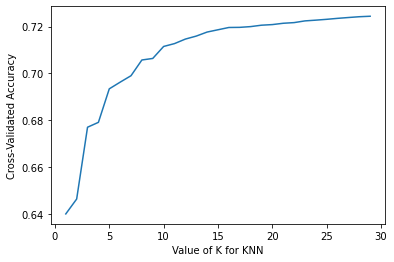

In [457]:
plt.plot(range(1, 30), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [458]:
parameters = dict(n_neighbors = range(30, 50))
grid = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

In [463]:
# view the complete results (list of named tuples)
grid.best_score_

0.7262113019179319

In [466]:
y_pred = grid.predict(X_test)

In [467]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7258366399640638


In [468]:
y_pred_p = grid.predict_proba(X_test)

In [471]:
y_pred_p

array([[0.66666667, 0.33333333],
       [0.97916667, 0.02083333],
       [0.29166667, 0.70833333],
       ...,
       [0.66666667, 0.33333333],
       [0.75      , 0.25      ],
       [0.5625    , 0.4375    ]])

In [476]:
y_pred_p_l = []
for i in y_pred_p:
    if i[0] > i[1]:
        y_pred_p_l.append(0)
    elif i[1] > i[0]:
        y_pred_p_l.append(1)
    else:
        y_pred_p_l.append(10)
len(y_pred_p_l)

13357

In [475]:
len(y_test)

13357

In [477]:
metrics.accuracy_score(y_test, y_pred_p_l)

0.7159541813281426

- If SD is high, the cross-validated estimate of the accuracy might not be as reliable


In [ ]:
# # Single best score achieved across all params (k)
# print(grid.best_score_)

# # Dictionary containing the parameters (k) used to generate that score
# print(grid.best_params_)

# # Actual model object fit with those best parameters
# # Shows default parameters that we did not specify
# print(grid.best_estimator_)

# Model 4: k = sqrt(53428) -- (continuous variables) -- Acc = 72%

In [511]:
Modelk21 = KNeighborsClassifier(n_neighbors = 231)
scores = cross_val_score(Modelk1, X_train, y_train, cv = 10, scoring = 'accuracy')
# print(scores)

In [437]:
print(scores.mean())

0.7228046850874629


In [439]:
M21 = Modelk21.fit(X_train, y_train)

In [441]:
y_pred = M21.predict(X_test)

In [442]:
metrics.accuracy_score(y_test, y_pred)

0.7206708093134686

In [512]:
# Without classes: 'years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
#        'smoke', 'alco', 'active']
Model4 = KNeighborsClassifier(n_neighbors = 231)
scores = cross_val_score(Model1, X_train, y_train, cv = 10, scoring = 'accuracy')

In [348]:
print(scores.mean())

0.6945611647496176


In [398]:
M4 = Model4.fit(X_train, y_train)

In [400]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7206708093134686


In [443]:
cm_k21 = confusion_matrix(y_test, y_pred)
cm_k21

array([[5293, 1503],
       [2228, 4333]], dtype=int64)

# Decision Tree

# Model 1
 - NO PRUNING
   - Here we create a basic tree structure based on the cleaned data collected 

In [477]:
df = pd.read_csv('df_final.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,age,years,age_cats,age_en,gender,height,weight,bmi,bmi_cats,ap_hi,ap_lo,bp_cats,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.39,"(44.0, 51.0]",1,0,168,62.0,22,1,110,80,2,1,1,0,0,1,0
1,20228,55.42,"(51.0, 58.0]",2,1,156,85.0,35,3,140,90,3,3,1,0,0,1,1
2,18857,51.66,"(51.0, 58.0]",2,1,165,64.0,24,1,130,70,2,3,1,0,0,0,1
3,17623,48.28,"(44.0, 51.0]",1,0,169,82.0,29,2,150,100,3,1,1,0,0,1,1
4,17474,47.87,"(44.0, 51.0]",1,1,156,56.0,23,1,100,65,0,1,1,0,0,0,0


In [478]:
X1 = df[['ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','age_en','bmi_cats','gender']]
y1 = df['cardio']

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state = 1)
dt1 = DecisionTreeClassifier()
dt1 = dt1.fit(X1_train,y1_train)
y1_test_pred = dt1.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y1_test_pred).round(3))

Accuracy: 0.701


# MODEL 2
 - Feature selection based on f values/p scores
   - We now try to see if the accuracy of the model can be improved by selecting specific features based on how much they affect our dependent variable 
   - This helps in reducing the computational cost of the model and often times improves the accuracy of the model

In [479]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
f_score=chi2(X1_train,y1_train)
f_score

(array([1.90256184e+04, 5.47181325e+03, 8.64858970e+02, 1.05575131e+02,
        1.94807012e+01, 6.10231001e+00, 1.55595511e+01, 1.47071758e+03,
        5.89896357e+02, 1.59427902e-01]),
 array([0.00000000e+000, 0.00000000e+000, 4.27787021e-190, 9.13672022e-025,
        1.01621223e-005, 1.35005291e-002, 7.99467422e-005, 0.00000000e+000,
        2.63908065e-130, 6.89683780e-001]))

In [480]:
p_values=f_score[1]
p_values

array([0.00000000e+000, 0.00000000e+000, 4.27787021e-190, 9.13672022e-025,
       1.01621223e-005, 1.35005291e-002, 7.99467422e-005, 0.00000000e+000,
       2.63908065e-130, 6.89683780e-001])

In [481]:
p_values=pd.Series(f_score[1])
p_values.index = X1_train.columns
p_values.sort_values(ascending=True)

ap_hi           0.000000e+00
ap_lo           0.000000e+00
age_en          0.000000e+00
cholesterol    4.277870e-190
bmi_cats       2.639081e-130
gluc            9.136720e-25
smoke           1.016212e-05
active          7.994674e-05
alco            1.350053e-02
gender          6.896838e-01
dtype: float64

In [482]:
from sklearn.feature_selection import SelectKBest, f_classif
predictors=X1_train.head(0)
selector = SelectKBest(chi2,k=5)
sf_fit=selector.fit(X1_train,y1_train)
for i in range(len(sf_fit.scores_)):
    print('%s:%f' % (X1.columns[i],sf_fit.scores_[i]))

ap_hi:19025.618407
ap_lo:5471.813251
cholesterol:864.858970
gluc:105.575131
smoke:19.480701
alco:6.102310
active:15.559551
age_en:1470.717585
bmi_cats:589.896357
gender:0.159428


C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


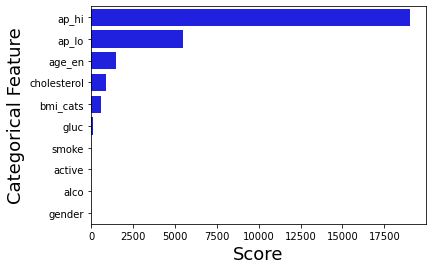

In [483]:
dataset=pd.DataFrame()
dataset['feature']=X1.columns[range(len(sf_fit.scores_))]
dataset['scores'] = sf_fit.scores_
dataset = dataset.sort_values(by='scores',ascending=False)
sns.barplot(dataset['scores'],dataset['feature'],color='blue')
plt.ylabel('Categorical Feature',fontsize=18)
plt.xlabel('Score',fontsize=18)
plt.show()

In [484]:
fscore = pd.Series(f_score[0])
fscore.index=X1_train.columns
fscr=fscore.sort_values(ascending=False)
fscr

ap_hi          19025.618407
ap_lo           5471.813251
age_en          1470.717585
cholesterol      864.858970
bmi_cats         589.896357
gluc             105.575131
smoke             19.480701
active            15.559551
alco               6.102310
gender             0.159428
dtype: float64

In [485]:
best = SelectKBest(chi2,k=6).fit(X1_train,y1_train)
X1_train.columns[best.get_support()]

Index(['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'age_en', 'bmi_cats'], dtype='object')

In [486]:
X1_train=best.transform(X1_train)
X1_test=best.transform(X1_test)

In [487]:
clf_best = DecisionTreeClassifier()
clf_best = clf_best.fit(X1_train,y1_train)
y1_test_pred = clf_best.predict(X1_test)
print("Accuracy: ",metrics.accuracy_score(y1_test, y1_test_pred).round(3))

Accuracy:  0.714


# MODEL 3 
 - GridSearchCV on MODEL 2
   - In model 2 we selected the best possible columns to form the branches and now in model 3 we use GridSearchCV to tune the other hyperparameters
   - The two parameters that are relevant here are max_features and max_depth
 

In [529]:
param = {
    "max_features": [1,2,4,6], 
    "max_depth": [1, 3, 5,9] }

In [530]:
gs = GridSearchCV(clf_best, param, cv = 5) # cv: cross validation
gs.fit(X1_train, np.ravel(y1_train, order = 'C')) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 9],
                         'max_features': [1, 2, 4, 6]})

In [531]:
y1_train_pred = gs.predict(X1_test)
y1_test_pred = gs.predict(X1_test)

result = metrics.accuracy_score(y1_test, y1_test_pred)
print(result)

0.7258366399640638


In [532]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    
    for mean, std, params in zip(mean_score, std_score, params):
        print(f'{round(mean, 3)} + or - {round(std, 3)} for the {params}')
        
display(gs)

Best parameters are: {'max_depth': 5, 'max_features': 6}


0.608 + or - 0.065 for the {'max_depth': 1, 'max_features': 1}
0.668 + or - 0.018 for the {'max_depth': 1, 'max_features': 2}
0.703 + or - 0.022 for the {'max_depth': 1, 'max_features': 4}
0.712 + or - 0.006 for the {'max_depth': 1, 'max_features': 6}
0.68 + or - 0.033 for the {'max_depth': 3, 'max_features': 1}
0.67 + or - 0.031 for the {'max_depth': 3, 'max_features': 2}
0.713 + or - 0.013 for the {'max_depth': 3, 'max_features': 4}
0.724 + or - 0.006 for the {'max_depth': 3, 'max_features': 6}
0.69 + or - 0.011 for the {'max_depth': 5, 'max_features': 1}
0.718 + or - 0.007 for the {'max_depth': 5, 'max_features': 2}
0.724 + or - 0.009 for the {'max_depth': 5, 'max_features': 4}
0.727 + or - 0.005 for the {'max_depth': 5, 'max_features': 6}
0.716 + or - 0.002 for the {'max_depth': 9, 'max_features': 1}
0.722 + or - 0.005 for the {'max_depth': 9, 'max_features': 2}
0.725 + or - 0.006 for the {'max_depth': 9, 'max_features': 4}

# Random Forest
- The way that Random Forest Classifier works is that it merges multiple decision trees together and makes a prediction based on.
- This tends to give a more accurate prediction in relation to decision trees. 
- The reason it's called 'Random' forest classifier is because in the process of splitting nodes, it chooses a subset of features randomly and then finds the best feature of that subset
- This increased diversity trains the model better to handle unknown data that is to be predicted

In [489]:
df = pd.read_csv('df_final.csv',header=0)
df.head()
X = df[['age_en','gender','bmi_cats','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
y = df['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))  

ACCURACY OF THE MODEL:  0.7101716909562787


In [490]:
features = ['age_en','gender','bmi_cats','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
feature_imp = pd.Series(clf.feature_importances_, index = features).sort_values(ascending = False)
feature_imp

ap_hi          0.399145
ap_lo          0.191162
age_en         0.110033
cholesterol    0.088565
bmi_cats       0.066918
gluc           0.043004
gender         0.032118
active         0.027919
smoke          0.021745
alco           0.019391
dtype: float64

In [491]:
best = SelectKBest(chi2,k=6).fit(X_train,y_train)

In [492]:
X_train.columns[best.get_support()]

Index(['age_en', 'bmi_cats', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc'], dtype='object')

In [493]:
X_train=best.transform(X_train)
X_test=best.transform(X_test)

In [494]:
clf_best = RandomForestClassifier()
clf_best = clf_best.fit(X_train,y_train)
y_test_pred = clf_best.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred).round(3))

Accuracy:  0.716


# Gradient Boost Classifer
- This algorithm is quite similar to the Random Forest Algorithm but they have some key differences:
- In gradient boost, each new tree is dependent on the parent node whereas in random forest, the trees are independent of each other
- This implies that gradient boost performs better but takes a lot of time to train due to their inherent dependency whereas random forest model trains faster as all the trees can be trained parallelly

In [496]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import confusion_matrix, classification_report, accuracy_score

In [497]:
X2 = df[['ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','age_en','bmi_cats','gender']]
y2 = df['cardio']

In [498]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 1)
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 2) # 100 trees 
gbc.fit(X2_train, np.ravel(y2_train))  

GradientBoostingClassifier(max_depth=2)

In [499]:
y2_pred = gbc.predict(X2_test)

In [500]:
cm1 = confusion_matrix(y2_test, y2_pred)
print('Confusion matrix: ',cm1)
as1 = accuracy_score(y2_test, y2_pred)
print('Accuracy score: ',as1)


Confusion matrix:  [[5313 1483]
 [2154 4407]]
Accuracy score:  0.7277083177360185


In [501]:
param = {
    "n_estimators": [50, 100, 150, 200, 250, 300], 
    "max_depth": [1, 3, 5], 
    "learning_rate": [0.01, 0.1, 1, 5, 10]
}

In [513]:
gscv2  = GridSearchCV(gbc, param, cv = 5) # cv: cross validation
gscv2.fit(X2_train, np.ravel(y2_train, order = 'C'))

In [550]:
y2_pred = gscv2.predict(X2_test)

In [551]:
cm2 = confusion_matrix(y2_test, y2_pred)
print('Confusion matrix: ',cm2)             
as2 = accuracy_score(y2_test, y2_pred)
print('Accuracy score: ',as2) 

Confusion matrix:  [[5450 1346]
 [2282 4279]]
Accuracy score:  0.7283821217339222


# Conclusion
- We observe similar accuracies across all algorithms in the range of 69% - 73%
- Applying GridSearchCV is noted to have improved accuracies all round.

# Predictions

In [459]:
pd.DataFrame(X_test.iloc[453]

years          0.199613
gender         1.000000
bmi            0.416667
ap_hi          0.250000
ap_lo          0.625000
cholesterol    2.000000
gluc           1.000000
smoke          0.000000
alco           0.000000
active         1.000000
Name: 55150, dtype: float64

In [463]:
# Naive Baye's

y_pred = model_1.predict(pd.DataFrame(X_test.iloc[453]))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [465]:
y_test.iloc[453]

0

In [507]:
x.to_csv('x.csv')

In [474]:
## KNN
loaded_model = pickle.load(open('knn1_file', 'rb'))
result = loaded_model.predict(x)
result

array([0, 1, 0], dtype=int64)

In [476]:
y_test.iloc[[453, 454, 455]]

55150    0
65290    0
23238    0
Name: cardio, dtype: int64

In [488]:
# Decision tree 
y = clf_best.predict(x.drop(['smoke', 'active'], axis = 1))
y

array([0, 0, 0], dtype=int64)

In [495]:
# Random Forest
yr = clf_best.predict(x.drop(['smoke', 'active'], axis = 1))
yr

array([0, 0, 0], dtype=int64)

# References:
- https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/#:~:text=Naive%20Bayes%20is%20a%20classification,we%20have%20large%20data%20points.
- https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/#:~:text=Gradient%20boosting%20is%20a%20greedy,the%20algorithm%20by%20reducing%20overfitting.
- https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/
- https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982#:~:text=Systolic%20blood%20pressure%2C%20the%20top,your%20arteries%20in%20between%20beats.
- https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html